<a href="https://colab.research.google.com/github/Johnnykoch02/GoogleCollabStuff/blob/main/PhysicsIILab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def Linest(x, y):
  n = len(y)
  dofreedom = n-2

  z, cov = np.polyfit(x,y,1,cov=True)
  p = np.poly1d(z)
  yp = p(x) #predicted y values based on fit
  slope = z[0]
  intercept = z[1]
  r2 = np.corrcoef(x,y)[0][1]**2
  regression_ss = np.sum( (yp-np.mean(y))**2)
  residual_ss = np.sum( (y-yp)**2 )
  slope_pm = np.sqrt(residual_ss / (dofreedom*np.sum(np.square((x-np.mean(x))))))
  intercept_pm = slope_pm*np.sqrt(np.sum(np.square(x))/n)
  s = np.sqrt(residual_ss/dofreedom)
  F = regression_ss/s**2

  return [[{'slope':slope}, {'intercept':intercept}],
  [{'slope_pm':slope_pm}, {'intercept_pm':intercept_pm}],
  [{'r^2':r2}, {'sey':s}],
  [{'F':F}, {'deg0fF':dofreedom}],
  [{'reg_ss':regression_ss},{'resid_ss':residual_ss}]]

{'slope': 61.98022203371982}, {'intercept': -3.2341916943289544}
{'slope_pm': 3.484982430859719}, {'intercept_pm': 5.100781293453637}
{'r^2': 0.9906045731866148}, {'sey': 3.6701560983352794}
{'F': 316.30428064491946}, {'deg0fF': 3}
{'reg_ss': 4260.633142641558}, {'resid_ss': 40.410137358442924}


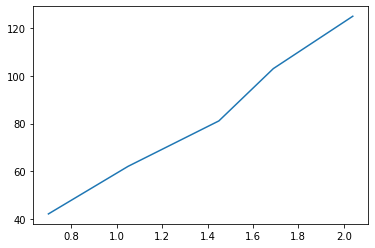

In [29]:
freq, Period = [42, 62, 81.1,103.09,125.1], [0.699,1.05,1.45,1.69,2.04]
V = 57.17
#
linest_data = Linest(Period, freq)
for i in linest_data:
  print("{}, {}".format(i[0], i[1]))


plt.plot(np.array(Period), freq) 

In [37]:
#Mass Per Unit Length
mass0fString = 2.3e-3 #kg
len0fString = 1.5 #m
stringDensity = mass0fString/len0fString
print("String Density: {:e} Kg / m".format(stringDensity))

String Density: 1.533333e-03 Kg / m


In [ ]:
# Force of Tension
mass0nString = 0.5 #kg
Tension = mass0nString * (9.81) #m/(s^2)
print("Tension: {:e} Newtons".format(stringDensity))

In [40]:
Velocity = np.sqrt(
    Tension / stringDensity
) #m/s
print("Velocity: {:e} Meters / Second".format(Velocity))

Velocity: 5.655893e+01 Meters / Second


In [43]:
pctError = (61.9802 - Velocity) / Velocity
print("Pct Error: {:.2f}%".format(pctError*100))

Pct Error: 9.59%
